# **Installing the Required Dependencies (GYM,STABLE-BASELINES AND other supporting **libraries**)**

In [1]:
!pip install gym
!pip install gym[atari,Box2D]
!pip install stable-baselines
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet
!apt-get install libjpeg-dev
!apt-get install -y python-numpy python-dev cmake zlib1g-dev libjpeg-dev xvfb ffmpeg xorg-dev  libboost-all-dev libsdl2-dev swig
!pip install xvfbwrapper
!apt-get update && sudo apt-get install cmake libopenmpi-dev python3-dev zlib1g-dev
!apt-get install python-opengl
!pip install IPython imageio

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
libjpeg-dev is already the newest version (8c-2ubuntu8).
python-dev is already the newest version (2.7.15~rc1-1).
python-numpy is already the newest version (1:1.13.3-2ubuntu1).
zlib1g-dev is al

# Phoenix Game from GYM-ATARI using DQN from stable-baselines

In [0]:
#IMPORT OF ALL THE DEPENDENCIES
import os
import gym
import numpy as np
import matplotlib.pyplot as plt
import imageio
from stable_baselines.common.vec_env.dummy_vec_env import DummyVecEnv
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results
from stable_baselines.common.atari_wrappers import make_atari
from stable_baselines.deepq.policies import  CnnPolicy,MlpPolicy,FeedForwardPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import DQN

In [3]:
#Creating a log for plotting the results
log_dir = "/temp/gym/Phoenix"
os.makedirs(log_dir, exist_ok=True)

#Loading the environment from GYM
env_name='Phoenix-v0'
env = gym.make(env_name)        
#Creating a Monitor for the log that would create monitor.csv
env = Monitor(env, log_dir, allow_early_resets=True)

# Creating the vectorized environment that has many observation spaces
env = DummyVecEnv([lambda: env])

#Loading the DQN model with the Convolution Neural Network layer
model = DQN(CnnPolicy, env, verbose=2)

/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [0]:
# Reference:  https://stable-baselines.readthedocs.io/en/master/guide/examples.html?highlight=monitor
def evaluate_mean(model, num_steps=1000):
  episode_rewards = [0.0]
  obs = env.reset()
  for i in range(num_steps):
      action, _states = model.predict(obs)
      # here, action, rewards and dones are arrays
      # because we are using vectorized env
      obs, rewards, dones, info = env.step(action)         
      episode_rewards[-1] += rewards[0]
      if dones[0]:
          obs = env.reset()
          episode_rewards.append(0.0)
  # Compute mean reward for the last 100 episodes
  mean_100ep_reward = round(np.mean(episode_rewards[-100:]), 1)
  print("Mean reward:", mean_100ep_reward, "Num episodes:", len(episode_rewards))

In [5]:
#Mean reward before training
evaluate_mean(model, num_steps=10000)

Mean reward: 0.0 Num episodes: 19


In [8]:
#Training the agent with 2000 and logging the results for 10 steps duration
model.learn(total_timesteps=2000,log_interval=10)

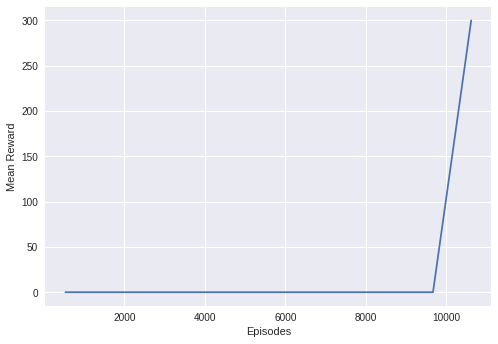

In [9]:
#Loading the results from the log and plotting them
results = load_results(log_dir)
import matplotlib.pyplot as plt
import numpy as np
plt.xlabel('Episodes')
plt.ylabel('Mean Reward')
plt.plot(np.cumsum(results.l),results.r)
plt.show()

In [11]:
#Mean Reward after Training
evaluate_mean(model, num_steps=10000)

Mean reward: 657.1 Num episodes: 7


In [0]:
#Loading the virtual display for the rendering function
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

#Making predictions of actions and saving the rendered environment into frames array
rew=[]
frames=[]
obs = env.reset()
for i in range(10000):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)    
    rew.append(rewards)        
    fig=env.render(mode='rgb_array')
    frames.append(fig)
    if done[0]:
        env.reset()
        break
env.close()

# **Saving  the predicted frame results as a gif and viewing the gif file**

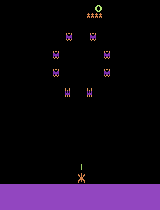

In [13]:
#saving the frames obtained as a GIF image
imageio.mimwrite('phoenix.gif',frames, fps=29)
try:
  from google.colab import files
except:
  print("Could not import Google Colab.")  
  
#Viewing the result GIF after training
from IPython.display import Image,display
with open('phoenix.gif','rb') as f:
    display(Image(data=f.read(), format='png'))